In [264]:
#Importing the libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
# Loading the data
df=pd.read_csv('titanic.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
844,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
738,739,0,3,"Ivanoff, Mr. Kanio",male,NaN,0,0,349201,7.8958,NaN,S
814,815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,NaN,S
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S


<h4>Here dependent feature is 'Survived' and rest are independent features.</h4>

In [266]:
df.shape

(891, 12)

In [267]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [268]:
df.dropna(subset=['Embarked'],inplace=True)

In [269]:
df.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)

In [270]:
TrainX,TestX,TrainY,TestY=train_test_split(df.drop(['Survived'],axis=1),df['Survived'],random_state=101,train_size=0.7)

In [271]:
TrainX.reset_index(drop=True,inplace=True)
TestX.reset_index(drop=True,inplace=True)

In [272]:
# Implementing OneHotEncoding on the categorical features Sex and Embarked so later it can help us to impute values for the Age feature
ohe=OneHotEncoder(drop='first',sparse=False,dtype=np.int16)
TrainX=pd.concat([TrainX.drop(['Sex','Embarked'],axis=1),pd.DataFrame(ohe.fit_transform(TrainX[['Sex','Embarked']]),columns=ohe.get_feature_names_out(TrainX[['Sex','Embarked']].columns))],axis=1)
TestX=pd.concat([TestX.drop(['Sex','Embarked'],axis=1),pd.DataFrame(ohe.transform(TestX[['Sex','Embarked']]),columns=ohe.get_feature_names_out(TestX[['Sex','Embarked']].columns))],axis=1)


In [273]:
TrainX

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,18.0,0,0,7.7750,0,0,1
1,2,18.0,0,1,23.0000,0,0,1
2,3,26.0,0,0,7.9250,0,0,1
3,1,31.0,1,0,57.0000,1,0,1
4,3,NaN,0,0,7.7500,1,1,0
...,...,...,...,...,...,...,...,...
617,2,34.0,0,0,13.0000,0,0,1
618,3,20.0,0,0,7.9250,1,0,1
619,3,45.0,0,0,8.0500,1,0,1
620,3,NaN,0,0,7.2292,1,0,0


In [274]:
TestX.isnull().mean()

Pclass        0.000000
Age           0.220974
SibSp         0.000000
Parch         0.000000
Fare          0.000000
Sex_male      0.000000
Embarked_Q    0.000000
Embarked_S    0.000000
dtype: float64

In [275]:
#Imputing the missing values of the Age feature
knnImp=KNNImputer(n_neighbors=6,weights='distance')
TrainX=pd.DataFrame(knnImp.fit_transform(TrainX),columns=TrainX.columns)
TestX=pd.DataFrame(knnImp.transform(TestX),columns=TestX.columns)


In [276]:
TestX

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3.0,24.916667,0.0,0.0,8.05,1.0,0.0,1.0
1,3.0,55.833333,0.0,0.0,7.75,1.0,1.0,0.0
2,2.0,24.000000,1.0,2.0,65.00,0.0,0.0,1.0
3,1.0,41.000000,0.0,0.0,134.50,0.0,0.0,0.0
4,3.0,24.892185,0.0,0.0,15.50,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
262,3.0,28.748292,8.0,2.0,69.55,0.0,0.0,1.0
263,3.0,55.833333,0.0,0.0,7.75,1.0,1.0,0.0
264,2.0,34.666667,0.0,0.0,0.00,1.0,0.0,1.0
265,1.0,35.000000,1.0,0.0,52.00,0.0,0.0,1.0


In [277]:
TrainX.isnull().mean()

Pclass        0.0
Age           0.0
SibSp         0.0
Parch         0.0
Fare          0.0
Sex_male      0.0
Embarked_Q    0.0
Embarked_S    0.0
dtype: float64

In [278]:
#Maintaining some copies of the data to work upon later
TrainX1, TestX1 = TrainX.copy(deep=True), TestX.copy(deep=True)
TrainX2, TestX2 = TrainX.copy(deep=True), TestX.copy(deep=True)

In [279]:
'''Applying PCA Manually'''
#Standardizing the data
TrainX_centered = TrainX-TrainX.mean(axis=0)
TrainX_centered

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.694534,-11.903743,-0.524116,-0.377814,-24.657388,-0.639871,-0.085209,0.273312
1,-0.305466,-11.903743,-0.524116,0.622186,-9.432388,-0.639871,-0.085209,0.273312
2,0.694534,-3.903743,-0.524116,-0.377814,-24.507388,-0.639871,-0.085209,0.273312
3,-1.305466,1.096257,0.475884,-0.377814,24.567612,0.360129,-0.085209,0.273312
4,0.694534,25.929591,-0.524116,-0.377814,-24.682388,0.360129,0.914791,-0.726688
...,...,...,...,...,...,...,...,...
617,-0.305466,4.096257,-0.524116,-0.377814,-19.432388,-0.639871,-0.085209,0.273312
618,0.694534,-9.903743,-0.524116,-0.377814,-24.507388,0.360129,-0.085209,0.273312
619,0.694534,15.096257,-0.524116,-0.377814,-24.382388,0.360129,-0.085209,0.273312
620,0.694534,-5.237076,-0.524116,-0.377814,-25.203188,0.360129,-0.085209,-0.726688


In [280]:
#Applying Singular Value Decomposition on data to find PC's
U, s, Vt = np.linalg.svd(TrainX_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
c1

array([-8.90866625e-03,  1.99706337e-02,  3.25179361e-03,  3.78088456e-03,
        9.99745402e-01, -1.79918729e-03, -5.81250939e-04, -1.57990279e-03])

In [281]:
#Projecting the data into 2 dimensions 
W2 = Vt.T[:,:2]
TrainX2D = TrainX_centered.dot(W2)
TrainX2D.columns=['PC1','PC2']
TrainX2D

,PC1,PC2
0,-24.897387,11.404400
1,-9.663574,11.701270
2,-24.587660,3.413103
3,24.593969,-0.626576
4,-24.167626,-26.410510
...,...,...
617,-19.345278,-4.499812
618,-24.709283,9.402928
619,-24.085049,-15.576757
620,-25.310130,4.724442


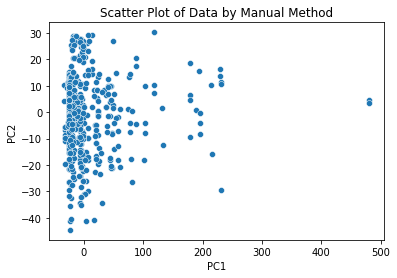

In [284]:
sns.scatterplot(data=TrainX2D,x='PC1',y='PC2')
plt.title('Scatter Plot of Data by Manual Method')
plt.savefig('ManualMethod.jpg')

In [254]:
'''Implementing Predefined PCA Class'''
pca = PCA(n_components = 2)
X2D = pca.fit_transform(TrainX1)

In [255]:
TrainX2D_pca=pd.DataFrame(X2D,columns=['PC1','PC2'])
TrainX2D_pca

,PC1,PC2
0,-24.897387,-11.404400
1,-9.663574,-11.701270
2,-24.587660,-3.413103
3,24.593969,0.626576
4,-24.167626,26.410510
...,...,...
617,-19.345278,4.499812
618,-24.709283,-9.402928
619,-24.085049,15.576757
620,-25.310130,-4.724442


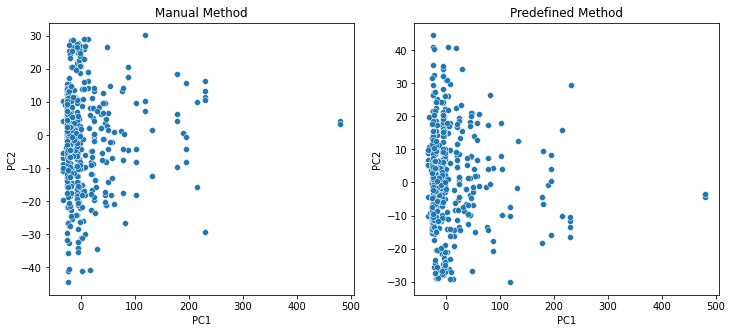

In [289]:
#Comparing the data of Manually contructed PCA vs Predefined PCA
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(data=TrainX2D,x='PC1',y='PC2',ax=axes[0])
axes[0].set_title('Manual Method')
sns.scatterplot(data=TrainX2D_pca,x='PC1',y='PC2',ax=axes[1])
axes[1].set_title('Predefined Method')
plt.savefig('Comparision.jpg')


In [260]:
pca.explained_variance_ratio_

array([0.93476724, 0.0643156 ])

In [290]:
#Preserving a certain percentage of variance  
pca1 = PCA()
pca1.fit(TrainX2)
cumsum = np.cumsum(pca1.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print("Principal Components requierd to preserve 95% variance:",d)

Principal Components requierd to preserve 95% variance: 2


In [261]:
#Principal Components are actually combinations of features, so any particular new feature(PC) is (at certain degree) correlated with different features
pca1.components_

array([[-8.90866625e-03,  1.99706337e-02,  3.25179361e-03,
         3.78088456e-03,  9.99745402e-01, -1.79918729e-03,
        -5.81250939e-04, -1.57990279e-03],
       [-2.02100036e-02,  9.99287485e-01, -2.06642886e-02,
        -1.22958047e-02, -2.00186319e-02,  5.90026157e-03,
         9.17609003e-04, -1.21569666e-03]])

In [262]:

#Presenting the correlation of PC with the features
pd.DataFrame(pca.components_,columns=TrainX2.columns,index = ['PC1','PC2'])

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PC-1,-0.008909,0.019971,0.003252,0.003781,0.999745,-0.001799,-0.000581,-0.001580
PC-2,-0.020210,0.999287,-0.020664,-0.012296,-0.020019,0.005900,0.000918,-0.001216


<h5>As we can see PC1 is mostly influenced by 'Fare' which means 'Fare' captures most of the variance in the data and even sounds logical, when titanic was sinking rich people lives were given the highest priority. For PC2, 'Age' has been selected as it covers the rest of the variance.</h5>